## Richter's Predictor: Modeling Earthquake Damage
##### Hosted by <a href='https://www.drivendata.org/'>Driven Data</a>
<br>

<img src="https://s3.amazonaws.com/drivendata-public-assets/nepal-quake-bm-2.JPG" width="600" height="350">
<br>
<br>

The Capstone project was carried out with the support of the competition made available by <a href='https://www.drivendata.org/'>Driven Data</a>. Following the 2015 Gorkha earthquake in Nepal a survey was carried out by   <a href='http://www.kathmandulivinglabs.org/'> Living Labs</a> and the <a href='https://cbs.gov.np/' >Central Bureau of Statistics</a>, the survey is one of the largest post-disaster datasets ever collected, containing valuable information on earthquake impacts, household conditions, and socio-economic-demographic statistics.

+ _Click <a href='https://en.wikipedia.org/wiki/April_2015_Nepal_earthquake'> here</a> to learn more_ 
 
#### Data Sources:
The data used in this projects can be found <a href='https://www.drivendata.org/competitions/57/nepal-earthquake/data/'> here.</a> However the totality of the data is available through the <a href='http://eq2015.npc.gov.np/#/'>2015 Nepal Earthquake Open Data Portal</a>

The dataset mainly consists of information on the buildings structure and their legal ownership. Each row in the dataset represents a specific building in the region that was hit by Gorkha earthquake. There are 39 columns in this dataset, where the building_id column is a unique and random identifier

### The analysis for this project will follow the CRISP-DM Process which are ;
+ _Business Understanding_ 
+ _Data Understanding_
+ _Data Preparation_
+ _Modelling_
+ _Evaluation_
+ _Deployment_


### Business Understanding
+ Use case:

Predicting Earthquake damage grade level has been a much needed and important research area, where the later instances of the destructive damage can be speculated. Following the effect of an earthquake, monitoring and detecting  the damage caused on the buildings is still a difficult task, as there involves many buildings that are affected. As a result it is important to have infomations about the building prior to when the earth quake occurs so that we can be able to determine the building that will be affeacted 

+ Goal

Based on aspects of building location and construction, the goal is to analyze predict the level of damage to buildings caused by the 2015 Gorkha earthquake in Nepal


### Data Understanding and Data Preparation
This stage involves loading the data and performing necessary data cleaning, preprocessing and feature engineering on the data to prepare it for analysis and modelling


In [1]:
##Importing Necessary Libraries
import pandas as pd
import numpy as np
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

%matplotlib inline
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,confusion_matrix,classification_report,f1_score
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.impute import SimpleImputer

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV,KFold,cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

from imblearn.pipeline import make_pipeline as imb_make_pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.preprocessing import  RobustScaler
import xgboost as xgb


from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

import os
arr = os.listdir()
print(arr)

Using TensorFlow backend.


['.ipynb_checkpoints', 'Modeling-Earthquake-Damage-master', 'Modeling-Earthquake-Damage-master.zip', 'nepal-quake-bm-2.jpg', "Richter's Predictor Modeling Earthquake Damage.ipynb", 'submission_format.csv', 'test_values.csv', 'train_labels.csv', 'train_values.csv']


In [2]:
train_data=pd.read_csv('train_values.csv')
train_labels=pd.read_csv('train_labels.csv')
test_data=pd.read_csv('test_values.csv')

In [3]:
print(train_data.shape)
print(train_labels.shape)

(260601, 39)
(260601, 2)


In [34]:
train_data.head(5)

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0       802906               6             487           12198   
1        28830               8             900            2812   
2        94947              21             363            8973   
3       590882              22             418           10694   
4       201944              11             131            1488   

   count_floors_pre_eq  age  area_percentage  height_percentage  \
0                    2   30                6                  5   
1                    2   10                8                  7   
2                    2   10                5                  5   
3                    2   10                6                  5   
4                    3   30                8                  9   

  land_surface_condition foundation_type  ... has_secondary_use_agriculture  \
0                      t               r  ...                             0   
1                      o               r  ...                             0   
2                      t               r  ...                             0   
3                      t               r  ...                             0   
4                      t               r  ...                             0   

  has_secondary_use_hotel has_secondary_use_rental  \
0                       0                        0   
1                       0                        0   
2                       0                        0   
3                       0                        0   
4                       0                        0   

  has_secondary_use_institution has_secondary_use_school  \
0                             0                        0   
1                             0                        0   
2                             0                        0   
3                             0                        0   
4                             0                        0   

   has_secondary_use_industry  has_secondary_use_health_post  \
0                           0                              0   
1                           0                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   has_secondary_use_gov_office  has_secondary_use_use_police  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   has_secondary_use_other  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  

[5 rows x 39 columns]

In [5]:
test_data.head(1)

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0       300051              17             596           11307   

   count_floors_pre_eq  age  area_percentage  height_percentage  \
0                    3   20                7                  6   

  land_surface_condition foundation_type  ... has_secondary_use_agriculture  \
0                      t               r  ...                             0   

  has_secondary_use_hotel has_secondary_use_rental  \
0                       0                        0   

  has_secondary_use_institution has_secondary_use_school  \
0                             0                        0   

   has_secondary_use_industry  has_secondary_use_health_post  \
0                           0                              0   

   has_secondary_use_gov_office  has_secondary_use_use_police  \
0                             0                             0   

   has_secondary_use_other  
0                        0  

[1 rows x 39 columns]

In [6]:
train_labels.head(1)

building_id  damage_grade
0       802906             3

The train label consist of each building id and its damage grade(1,2,3) hence we merge the labels with the training data on the building id

+ `1` represents low damage
+ `2` represents a medium amount of damage
+ `3` represents almost complete destruction

In [7]:
df = train_data.merge(train_labels, how = 'inner', on = 'building_id')

In [8]:
print(df.shape)

(260601, 40)


In [9]:
#Change the damage grade column to type catgory
df['damage_grade'] = df['damage_grade'].astype('category')

In [10]:
#Checking for duplicates
print('Shape before dropping duplicates', df.shape)
df.drop_duplicates(subset='building_id', keep='last')
print('Shape after dropping duplicates', df.shape)

Shape before dropping duplicates (260601, 40)
Shape after dropping duplicates (260601, 40)


In [11]:
df.isnull().mean()*100

building_id                               0.0
geo_level_1_id                            0.0
geo_level_2_id                            0.0
geo_level_3_id                            0.0
count_floors_pre_eq                       0.0
age                                       0.0
area_percentage                           0.0
height_percentage                         0.0
land_surface_condition                    0.0
foundation_type                           0.0
roof_type                                 0.0
ground_floor_type                         0.0
other_floor_type                          0.0
position                                  0.0
plan_configuration                        0.0
has_superstructure_adobe_mud              0.0
has_superstructure_mud_mortar_stone       0.0
has_superstructure_stone_flag             0.0
has_superstructure_cement_mortar_stone    0.0
has_superstructure_mud_mortar_brick       0.0
has_superstructure_cement_mortar_brick    0.0
has_superstructure_timber         

In [12]:
df.head(5)

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0       802906               6             487           12198   
1        28830               8             900            2812   
2        94947              21             363            8973   
3       590882              22             418           10694   
4       201944              11             131            1488   

   count_floors_pre_eq  age  area_percentage  height_percentage  \
0                    2   30                6                  5   
1                    2   10                8                  7   
2                    2   10                5                  5   
3                    2   10                6                  5   
4                    3   30                8                  9   

  land_surface_condition foundation_type  ... has_secondary_use_hotel  \
0                      t               r  ...                       0   
1                      o               r  ...                       0   
2                      t               r  ...                       0   
3                      t               r  ...                       0   
4                      t               r  ...                       0   

  has_secondary_use_rental has_secondary_use_institution  \
0                        0                             0   
1                        0                             0   
2                        0                             0   
3                        0                             0   
4                        0                             0   

  has_secondary_use_school has_secondary_use_industry  \
0                        0                          0   
1                        0                          0   
2                        0                          0   
3                        0                          0   
4                        0                          0   

   has_secondary_use_health_post  has_secondary_use_gov_office  \
0                              0                             0   
1                              0                             0   
2                              0                             0   
3                              0                             0   
4                              0                             0   

   has_secondary_use_use_police  has_secondary_use_other  damage_grade  
0                             0                        0             3  
1                             0                        0             2  
2                             0                        0             3  
3                             0                        0             2  
4                             0                        0             3  

[5 rows x 40 columns]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
building_id                               260601 non-null int64
geo_level_1_id                            260601 non-null int64
geo_level_2_id                            260601 non-null int64
geo_level_3_id                            260601 non-null int64
count_floors_pre_eq                       260601 non-null int64
age                                       260601 non-null int64
area_percentage                           260601 non-null int64
height_percentage                         260601 non-null int64
land_surface_condition                    260601 non-null object
foundation_type                           260601 non-null object
roof_type                                 260601 non-null object
ground_floor_type                         260601 non-null object
other_floor_type                          260601 non-null object
position                                  260601 non

In [14]:
df.select_dtypes(include=['int64']).columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'count_families', 'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other'],
      dtype='object')

In [15]:
df.select_dtypes(include=['category', object]).columns

Index(['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status', 'damage_grade'],
      dtype='object')

In [16]:
#Creating a categorial name for the damage_grade column
damage_map = {1: 'Low', 2: 'Medium', 3: 'High'}
df['damage_grade'] = df['damage_grade'].map(damage_map)

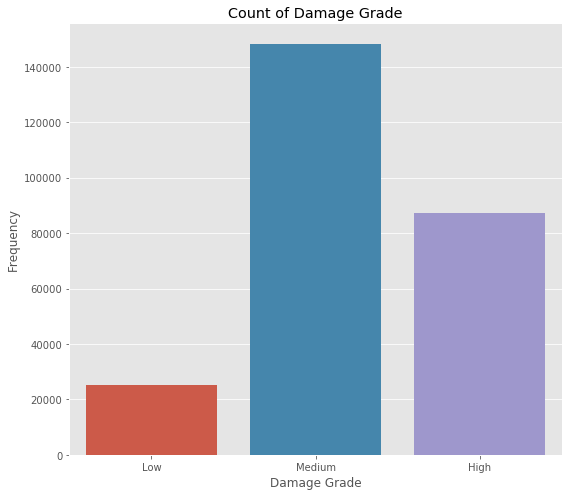

In [17]:
plt.figure(figsize = (8,7))
sns.countplot(x='damage_grade',data=df)
plt.xlabel('Damage Grade')
plt.ylabel('Frequency')
plt.title('Count of Damage Grade')
plt.tight_layout()

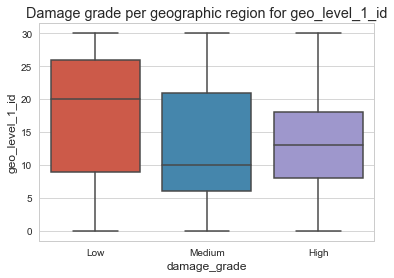

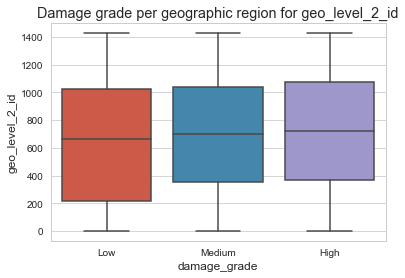

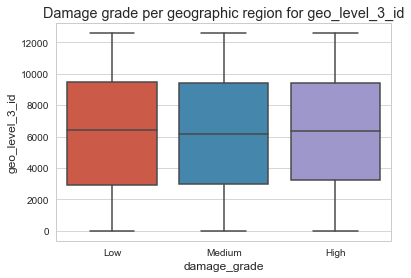

In [18]:
def plot_box(df, cols, col_x = 'damage_grade'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col_x, col, data=df)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.title('Damage grade per geographic region for ' + str(col))
        plt.show()
        

num_cols = ['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id']
plot_box(df, num_cols)

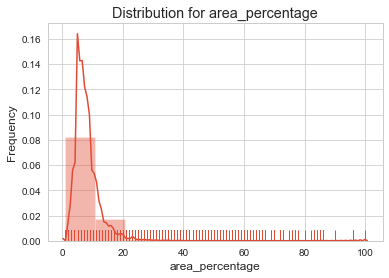

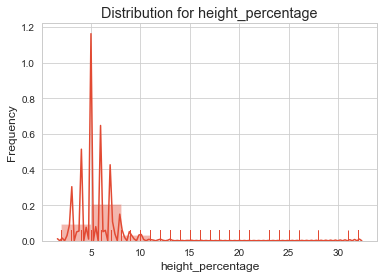

In [19]:
column=['area_percentage', 'height_percentage']
def distplot(df, column, bins = 10, hist = False):
    for col in column:
        sns.distplot(df[col], bins=bins, rug=True, hist=hist)
        plt.title('Distribution for ' + col)
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

distplot(df, column, hist= True)

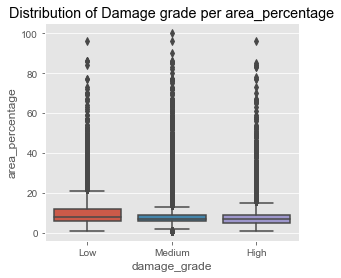

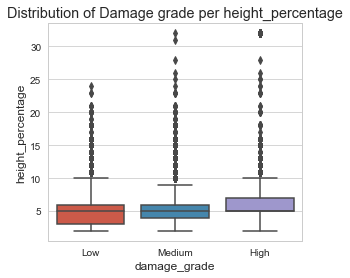

In [32]:
def plot_box(df, cols, col_x = 'damage_grade'):
    for col in cols:
        _ = plt.figure(figsize = (10,4))
        plt.subplot(1, 2, 1)
        sns.set_style("whitegrid")
        sns.boxplot(col_x, col, data=df)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.title('Distribution of Damage grade per ' + str(col))
        plt.show()
        

num_cols = ['area_percentage', 'height_percentage']
plot_box(df, num_cols)

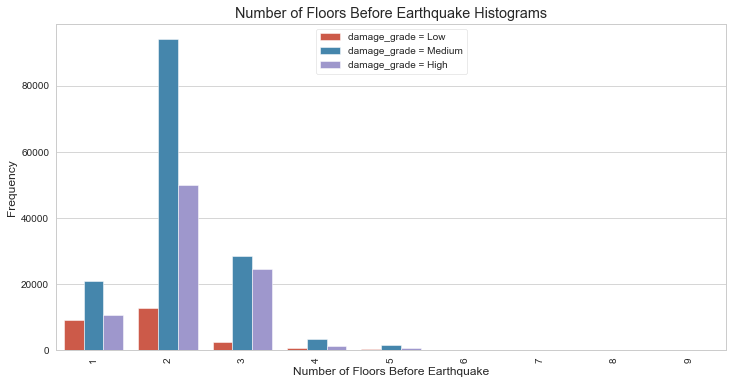

In [21]:
plt.figure(figsize=(12,6))
sns.countplot(df["count_floors_pre_eq"], hue=df["damage_grade"])
plt.ylabel("Frequency")
plt.xlabel("Number of Floors Before Earthquake")
plt.xticks(rotation=90)
plt.title("Number of Floors Before Earthquake Histograms")
plt.legend(["damage_grade = Low","damage_grade = Medium","damage_grade = High"])
plt.show()

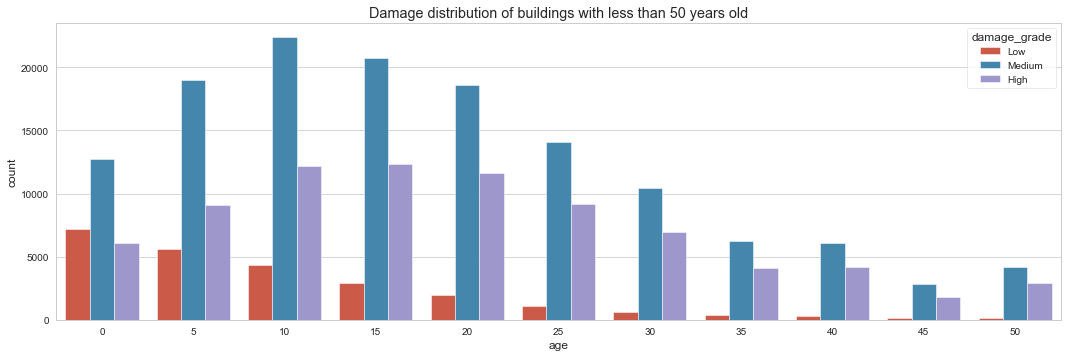

In [19]:
plt.figure(figsize=(18,12))
plt.subplot(211)
plt.title('Damage distribution of buildings with less than 50 years old')
tr=df[df['age']<=50]
sns.countplot(x='age',data=tr,hue='damage_grade')

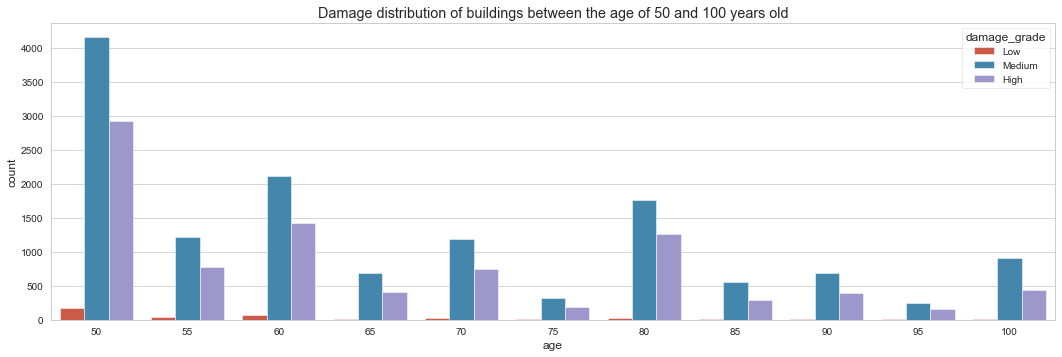

In [20]:
plt.figure(figsize=(18,12))
plt.subplot(211)
plt.title('Damage distribution of buildings between the age of 50 and 100 years old')
tr = df.loc[(df['age'] >= 50) & (df['age']<=100)]
sns.countplot(x='age',data=tr,hue='damage_grade')

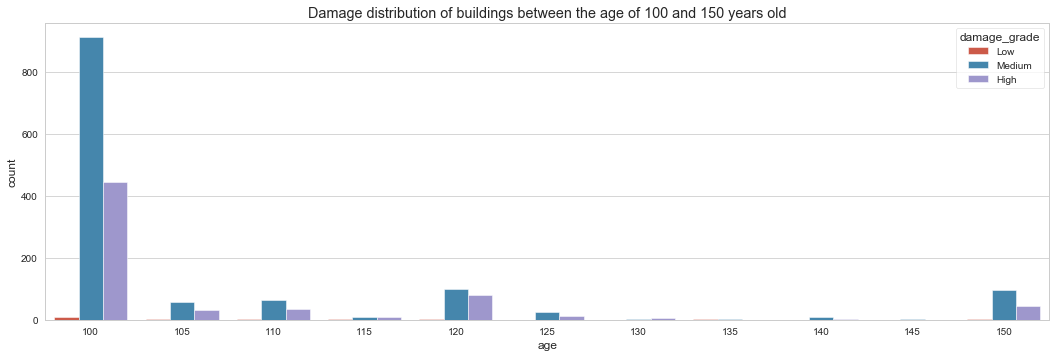

In [21]:
plt.figure(figsize=(18,12))
plt.subplot(211)
plt.title('Damage distribution of buildings between the age of 100 and 150 years old')
tr = df.loc[(df['age'] >= 100) & (df['age']<=150)]
sns.countplot(x='age',data=tr,hue='damage_grade')

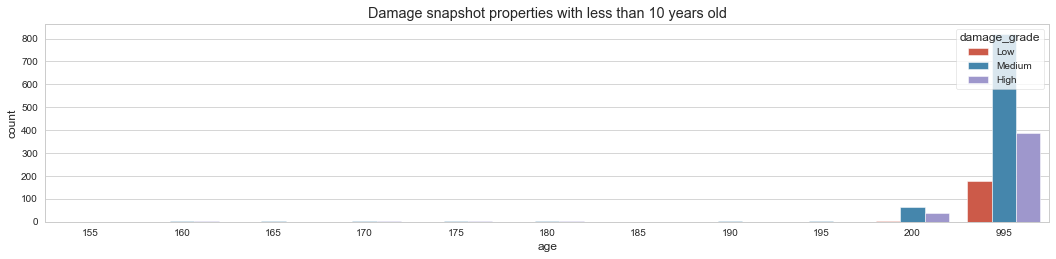

In [22]:
plt.figure(figsize=(18,8))
plt.subplot(211)
plt.title('Damage snapshot properties with less than 10 years old')
tr=df[df['age']>150]
sns.countplot(x='age',data=tr,hue='damage_grade')

In [ ]:
for data, row in Data.iterrows():
    if row.NoofPromise < 6:
        Data.loc[data, 'NoofPromise'] = '1-5'
    elif row.NoofPromise > 5 and row.NoofPromise < 11:
        Data.loc[data, 'NoofPromise'] = '6-10'
    elif row.NoofPromise > 10 and row.NoofPromise <= 15:
        Data.loc[data, 'NoofPromise'] = '11-15'
    elif row.NoofPromise > 15 and row.NoofPromise <= 20:
        Data.loc[data, 'NoofPromise'] = '16-20'
    elif row.NoofPromise >20  and row.NoofPromise <= 25:
        Data.loc[data, 'NoofPromise'] = '20-25'
    elif row.NoofPromise > 25 :
        Data.loc[data, 'NoofPromise'] = '>26'

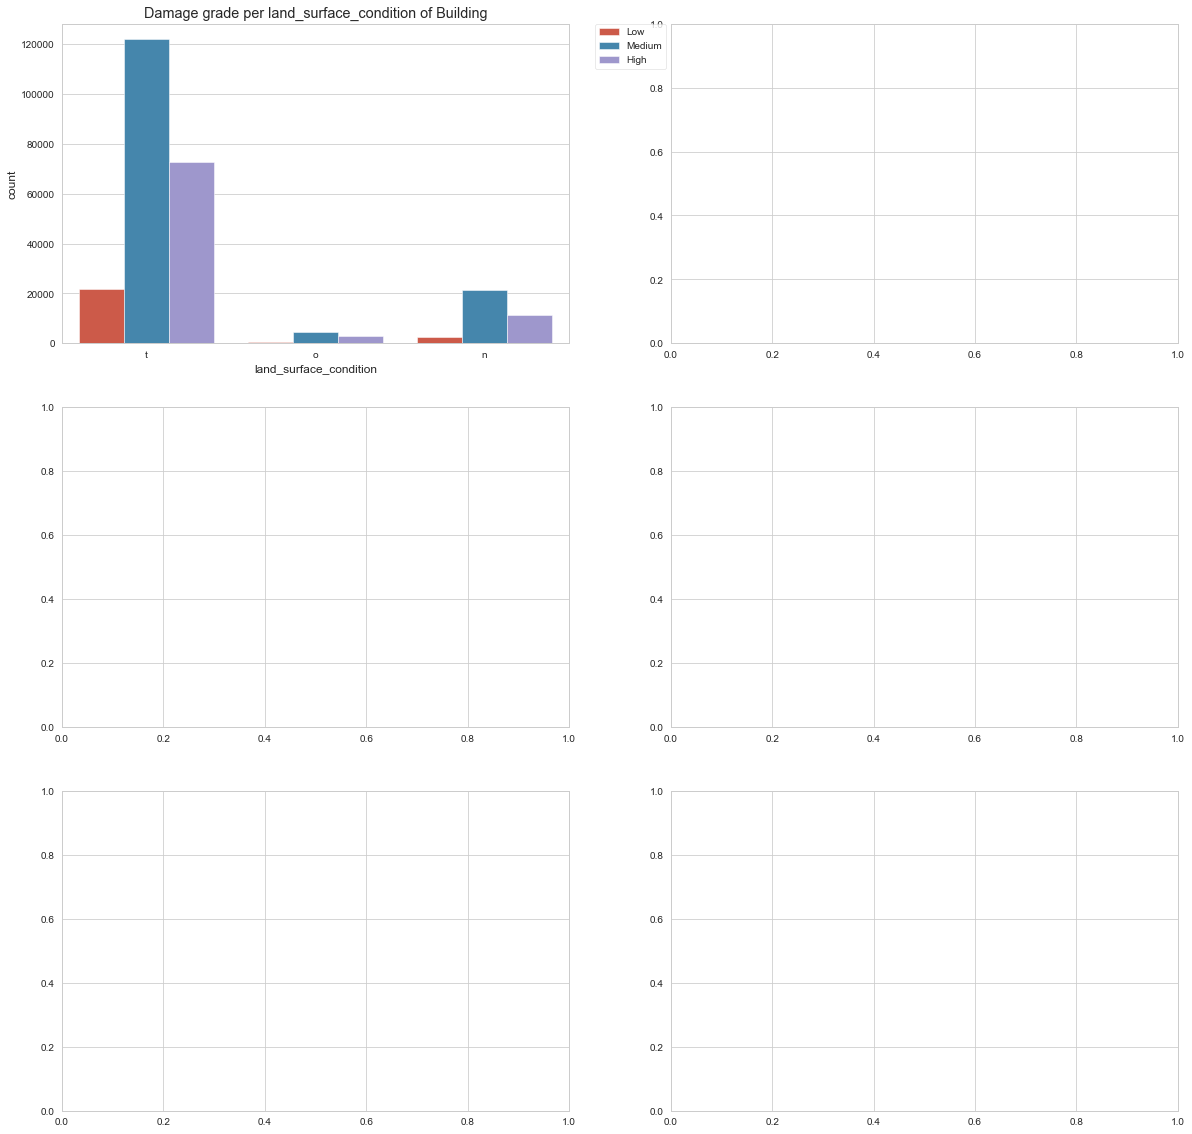

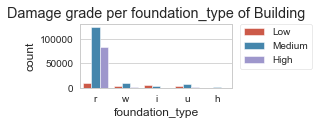

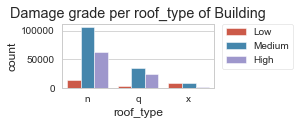

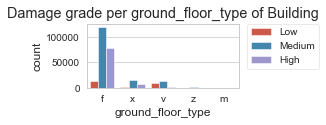

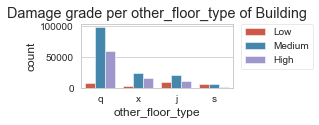

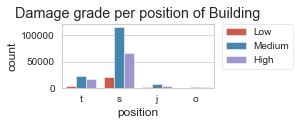

ValueError: num must be 1 <= num <= 6, not 7

<Figure size 432x288 with 0 Axes>

In [29]:
def plot_box(df, cols, col_x = 'damage_grade'):
    plt.subplots(3,2,figsize=(20,20))
    for k, col in enumerate(cat_cols,1):
    #for col in cols:
        plt.subplot(3,2,k)
        sns.set_style("whitegrid")
        sns.countplot(hue=col_x, x=col, data=df)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel('count')# Set text for y axis
        plt.title('Damage grade per ' + str(col)+' of Building')
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.show()
        

cat_cols = ['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status']
plot_box(df, cat_cols)

In [ ]:
cat_num_cols = ['has_superstructure_adobe_mud','has_superstructure_mud_mortar_stone','has_superstructure_stone_flag',
                             'has_superstructure_cement_mortar_stone','has_superstructure_mud_mortar_brick','has_superstructure_cement_mortar_brick',
                             'has_superstructure_timber','has_superstructure_bamboo','has_superstructure_rc_non_engineered',
                             'has_superstructure_rc_engineered','has_superstructure_other','count_families','has_secondary_use',
                             'has_secondary_use_agriculture','has_secondary_use_hotel','has_secondary_use_rental','has_secondary_use_institution',
                             'has_secondary_use_school','has_secondary_use_industry','has_secondary_use_health_post',
                             'has_secondary_use_gov_office','has_secondary_use_use_police','has_secondary_use_other']

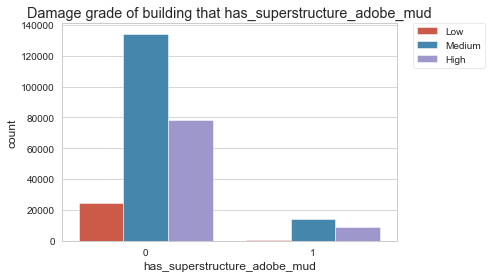

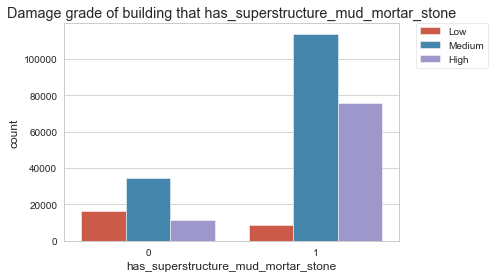

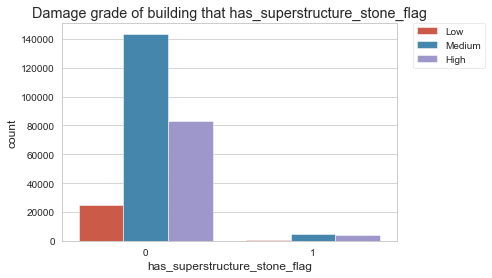

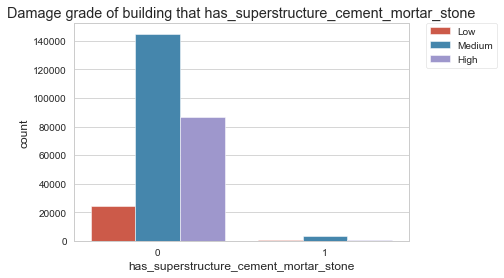

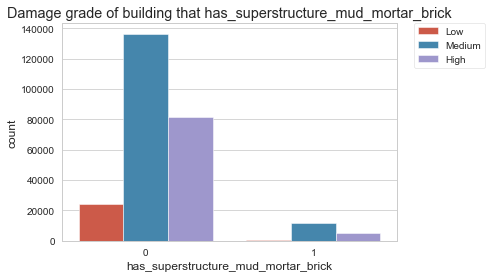

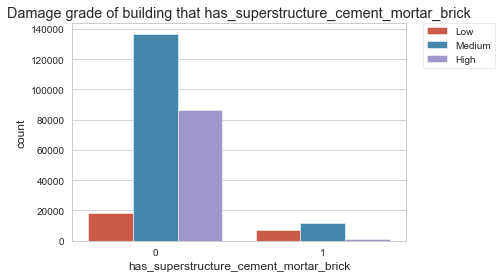

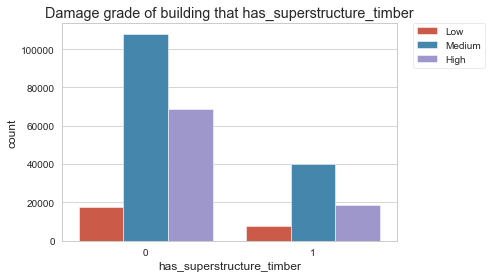

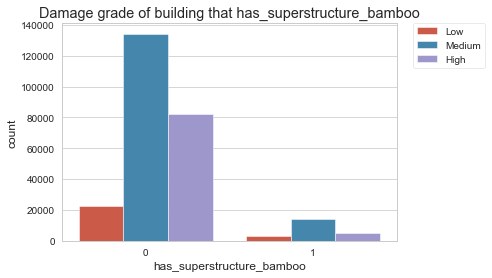

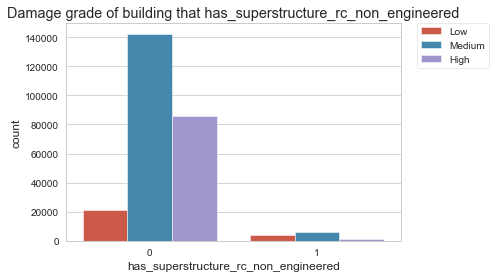

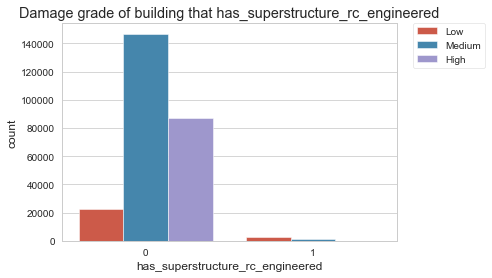

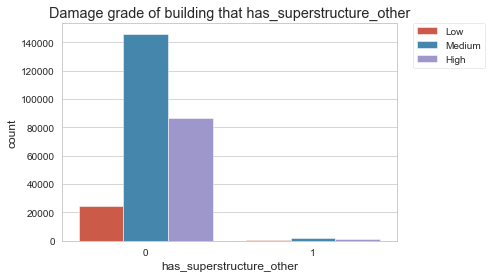

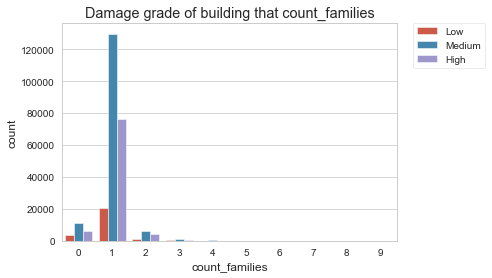

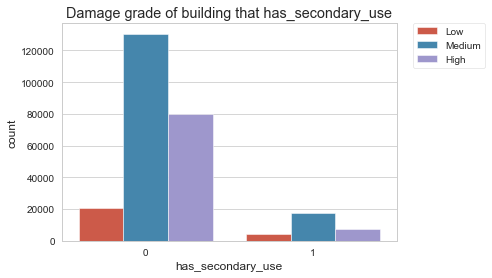

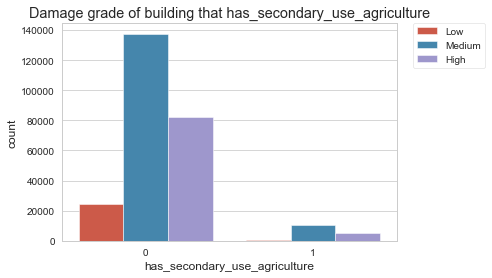

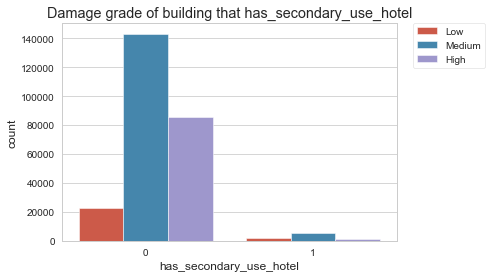

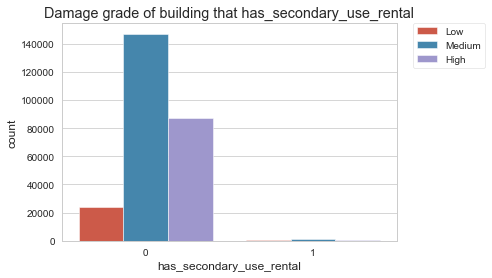

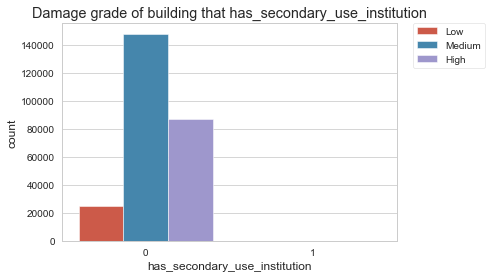

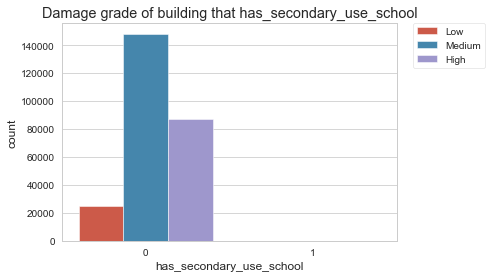

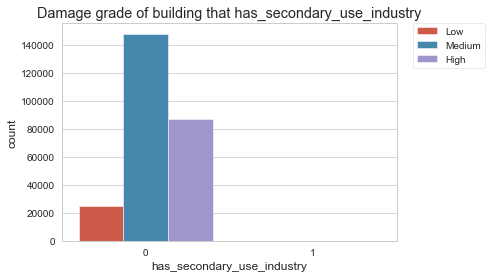

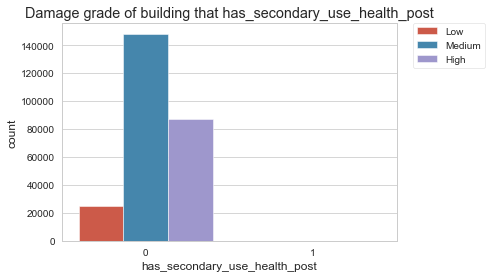

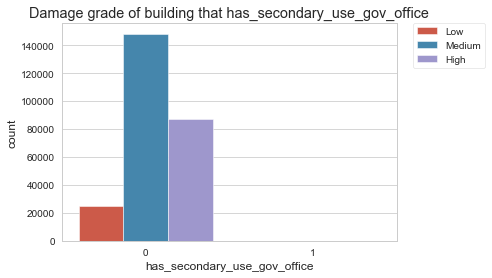

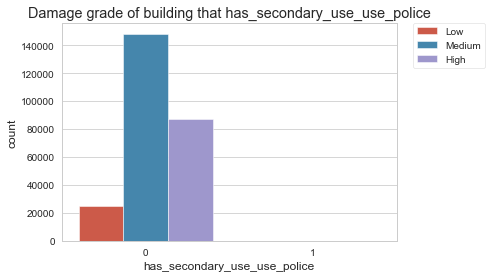

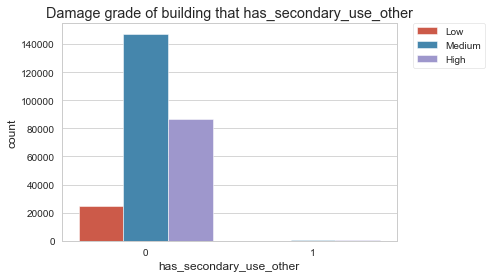

In [103]:
def plot_box(df, cols, col_x = 'damage_grade'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.countplot(hue=col_x, x=col, data=df)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel('count')# Set text for y axis
        plt.title('Damage grade of building that ' + str(col))
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.show()
        

cat_num_cols = ['has_superstructure_adobe_mud','has_superstructure_mud_mortar_stone','has_superstructure_stone_flag',
                             'has_superstructure_cement_mortar_stone','has_superstructure_mud_mortar_brick','has_superstructure_cement_mortar_brick',
                             'has_superstructure_timber','has_superstructure_bamboo','has_superstructure_rc_non_engineered',
                             'has_superstructure_rc_engineered','has_superstructure_other','count_families','has_secondary_use',
                             'has_secondary_use_agriculture','has_secondary_use_hotel','has_secondary_use_rental','has_secondary_use_institution',
                             'has_secondary_use_school','has_secondary_use_industry','has_secondary_use_health_post',
                             'has_secondary_use_gov_office','has_secondary_use_use_police','has_secondary_use_other']
plot_box(df, cat_num_cols)

#### Multivariant Analysis

In [33]:
df.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
building_id                               260601 non-null int64
geo_level_1_id                            260601 non-null int64
geo_level_2_id                            260601 non-null int64
geo_level_3_id                            260601 non-null int64
count_floors_pre_eq                       260601 non-null int64
age                                       260601 non-null int64
area_percentage                           260601 non-null int64
height_percentage                         260601 non-null int64
land_surface_condition                    260601 non-null object
foundation_type                           260601 non-null object
roof_type                                 260601 non-null object
ground_floor_type                         260601 non-null object
other_floor_type                          260601 non-null object
position                                  260601 non

In [63]:
corr_features=df[['damage_grade','geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
       'has_secondary_use_health_post', 'has_secondary_use_gov_office',
       'has_secondary_use_use_police', 'has_secondary_use_other']]

In [64]:
doc={'Low':1, 'Medium':2,  'High':3}
dataset=[corr_features]
for data in dataset:
    corr_features['damage_grade']=corr_features['damage_grade'].replace(doc)

In [43]:
corr_matrix=corr_features.corr()

In [44]:
corr_matrix

damage_grade  geo_level_1_id  \
damage_grade                                1.000000       -0.072347   
geo_level_1_id                             -0.072347        1.000000   
geo_level_2_id                              0.043161       -0.061405   
geo_level_3_id                              0.007932        0.002718   
count_floors_pre_eq                         0.122308       -0.089364   
age                                         0.029273       -0.003908   
area_percentage                            -0.125221        0.071158   
height_percentage                           0.048130       -0.063474   
has_superstructure_adobe_mud                0.055314       -0.018245   
has_superstructure_mud_mortar_stone         0.291325       -0.152038   
has_superstructure_stone_flag               0.066039        0.007677   
has_superstructure_cement_mortar_stone     -0.060295        0.023656   
has_superstructure_mud_mortar_brick         0.014561       -0.028854   
has_superstructure_cement_mortar_brick     -0.254131        0.134121   
has_superstructure_timber                  -0.069852        0.144985   
has_superstructure_bamboo                  -0.063051        0.074169   
has_superstructure_rc_non_engineered       -0.158145        0.016454   
has_superstructure_rc_engineered           -0.179014        0.015767   
has_superstructure_other                   -0.030224        0.022670   
count_families                              0.056151        0.035108   
has_secondary_use                          -0.079630       -0.010428   
has_secondary_use_agriculture               0.011309       -0.019786   
has_secondary_use_hotel                    -0.097942        0.001911   
has_secondary_use_rental                   -0.083754        0.023523   
has_secondary_use_institution              -0.028728        0.003700   
has_secondary_use_school                   -0.011692        0.002977   
has_secondary_use_industry                 -0.011024        0.002655   
has_secondary_use_health_post              -0.008543       -0.002303   
has_secondary_use_gov_office               -0.009378        0.001060   
has_secondary_use_use_police               -0.001656        0.000523   
has_secondary_use_other                    -0.016334       -0.017992   

                                        geo_level_2_id  geo_level_3_id  \
damage_grade                                  0.043161        0.007932   
geo_level_1_id                               -0.061405        0.002718   
geo_level_2_id                                1.000000        0.000921   
geo_level_3_id                                0.000921        1.000000   
count_floors_pre_eq                           0.047730       -0.021646   
age                                           0.012594       -0.006385   
area_percentage                              -0.049443       -0.005643   
height_percentage                             0.035516       -0.024507   
has_superstructure_adobe_mud                  0.015833       -0.015732   
has_superstructure_mud_mortar_stone           0.076491        0.026294   
has_superstructure_stone_flag                -0.008743        0.019579   
has_superstructure_cement_mortar_stone       -0.009122        0.005966   
has_superstructure_mud_mortar_brick           0.014246       -0.023278   
has_superstructure_cement_mortar_brick       -0.079875       -0.005116   
has_superstructure_timber                    -0.023927       -0.003916   
has_superstructure_bamboo                    -0.032588        0.006143   
has_superstructure_rc_non_engineered         -0.038173        0.002265   
has_superstructure_rc_engineered             -0.036074       -0.012420   
has_superstructure_other                     -0.020144       -0.010604   
count_families                               -0.012439       -0.002479   
has_secondary_use                            -0.001519        0.007375   
has_secondary_use_agriculture                 0.017522        0.015995   
has_secondary_use_hotel          

In [45]:
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

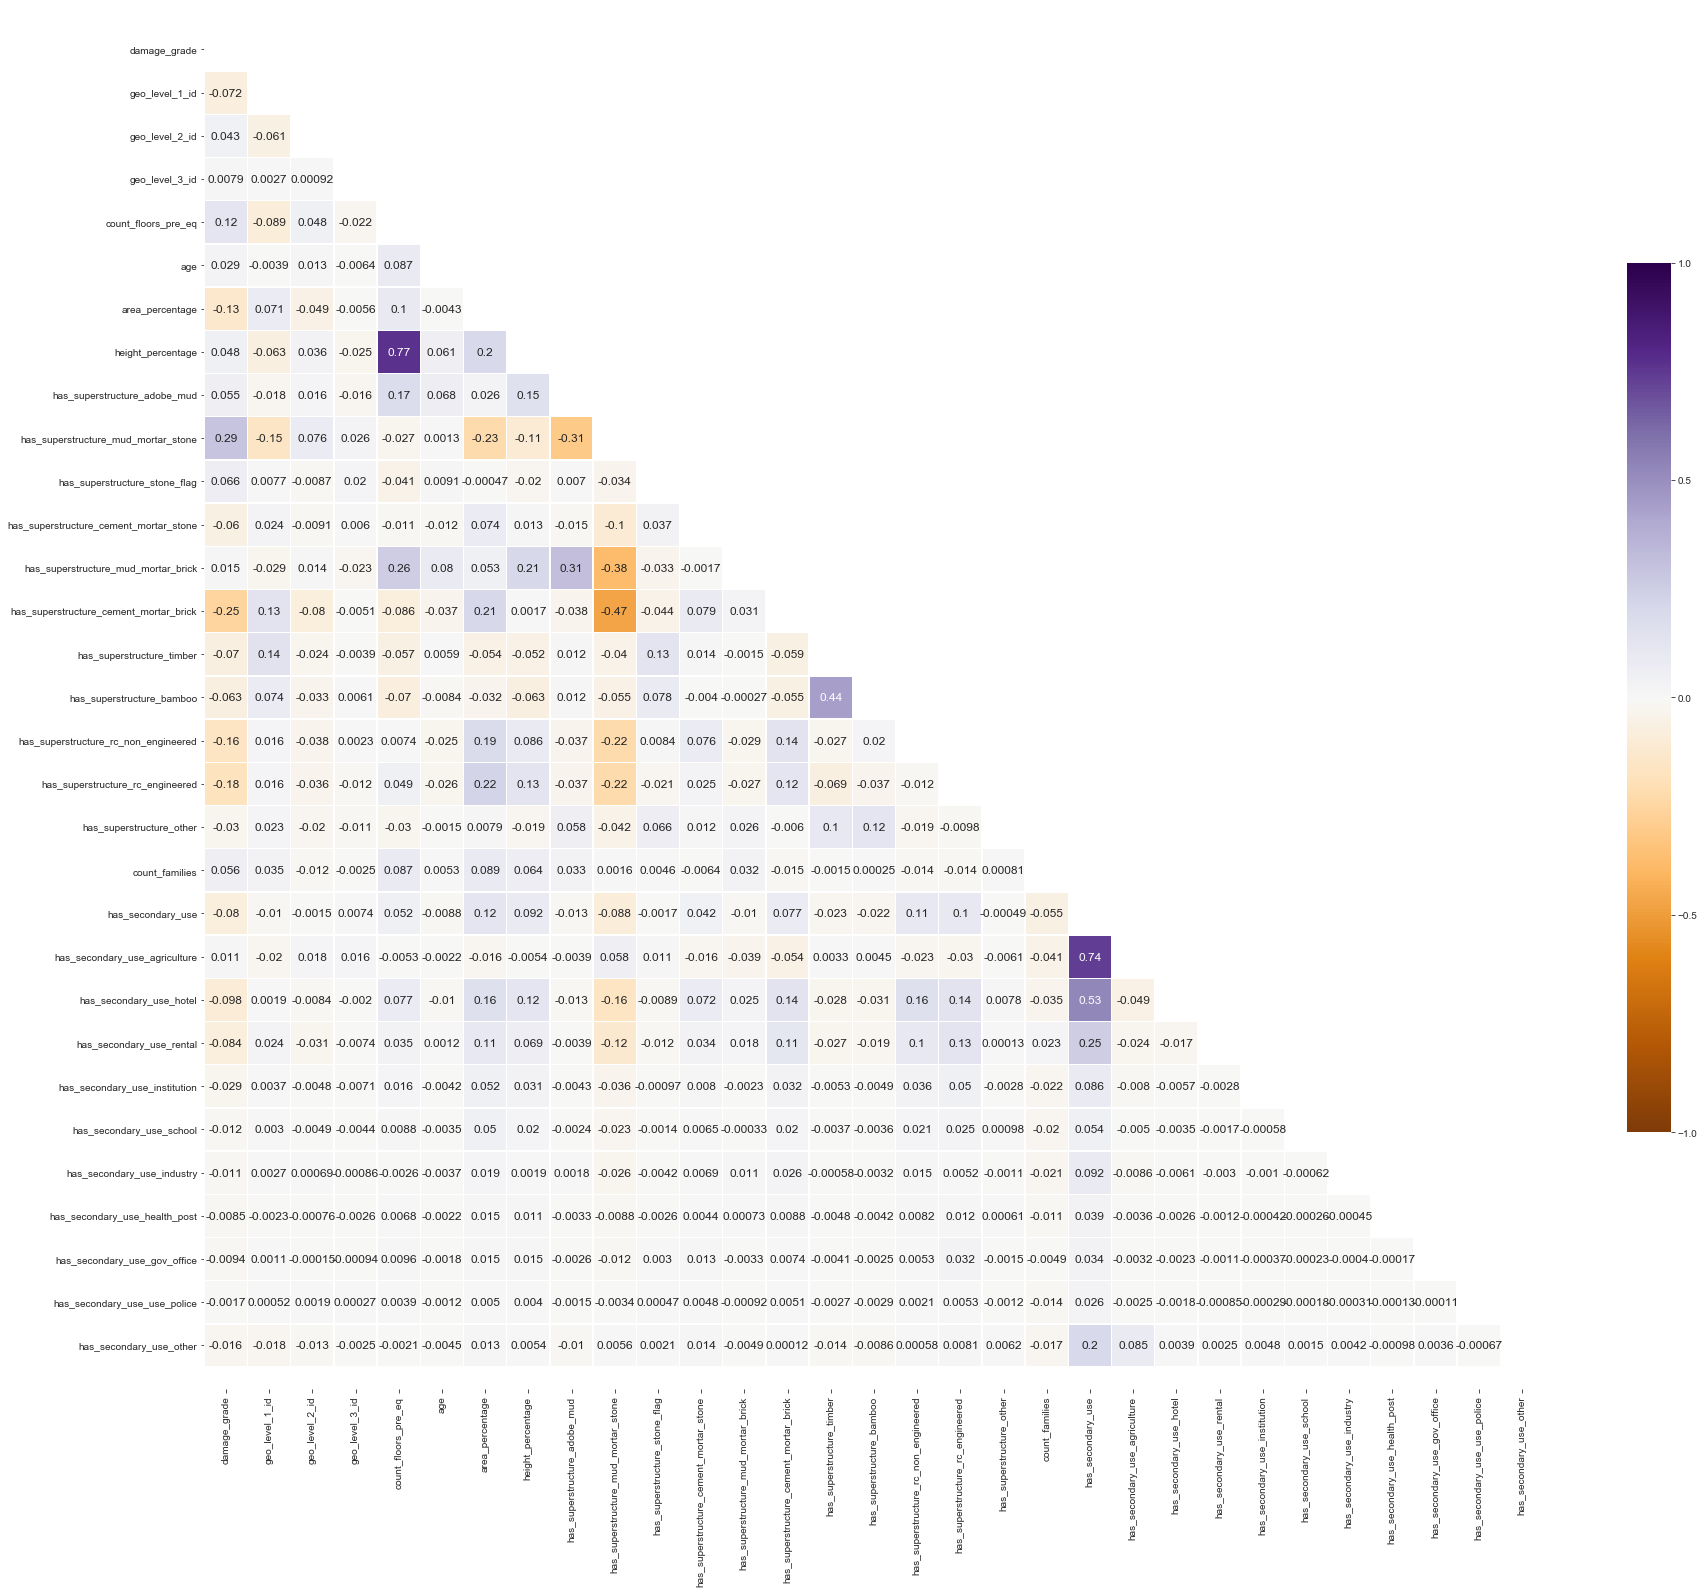

In [48]:
f, ax = plt.subplots(figsize=(30, 40))
heatmap = sns.heatmap(corr_matrix,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'PuOr',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [51]:
corr_features.head()

damage_grade  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0             3               6             487           12198   
1             2               8             900            2812   
2             3              21             363            8973   
3             2              22             418           10694   
4             3              11             131            1488   

   count_floors_pre_eq  age  area_percentage  height_percentage  \
0                    2   30                6                  5   
1                    2   10                8                  7   
2                    2   10                5                  5   
3                    2   10                6                  5   
4                    3   30                8                  9   

   has_superstructure_adobe_mud  has_superstructure_mud_mortar_stone  ...  \
0                             1                                    1  ...   
1                             0                                    1  ...   
2                             0                                    1  ...   
3                             0                                    1  ...   
4                             1                                    0  ...   

   has_secondary_use_agriculture  has_secondary_use_hotel  \
0                              0                        0   
1                              0                        0   
2                              0                        0   
3                              0                        0   
4                              0                        0   

   has_secondary_use_rental  has_secondary_use_institution  \
0                         0                              0   
1                         0                              0   
2                         0                              0   
3                         0                              0   
4                         0                              0   

   has_secondary_use_school  has_secondary_use_industry  \
0                         0                           0   
1                         0                           0   
2                         0                           0   
3                         0                           0   
4                         0                           0   

   has_secondary_use_health_post  has_secondary_use_gov_office  \
0                              0                             0   
1                              0                             0   
2                              0                             0   
3                              0                             0   
4                              0                             0   

   has_secondary_use_use_police  has_secondary_use_other  
0                             0                        0  
1                             0                        0  
2                             0                        0  
3                             0                        0  
4                             0                        0  

[5 rows x 31 columns]

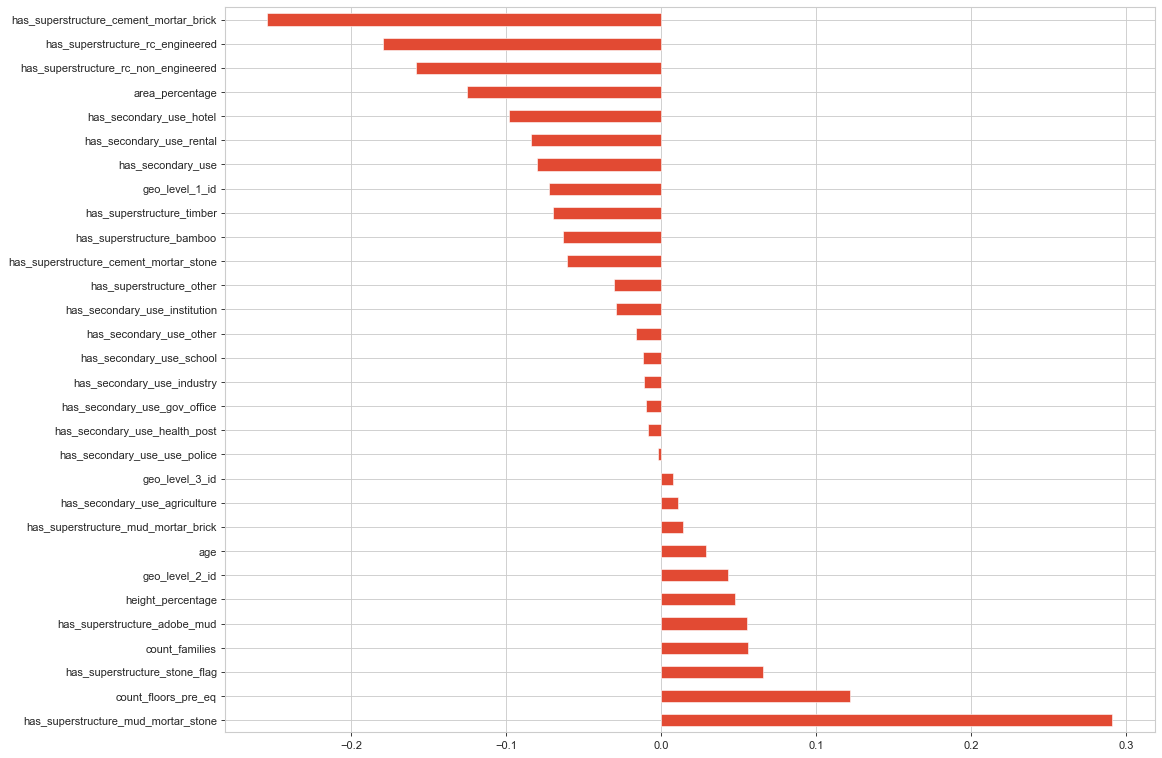

In [67]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(15,12), dpi=80, facecolor='w', edgecolor='k')
corr_matrix.damage_grade.drop('damage_grade').sort_values(ascending=False).plot.barh() 

### Model Building

In [17]:
#lets look at the distribution of the target varable- damage grade
df.damage_grade.value_counts(normalize=True)*100

Medium    56.891186
High      33.468022
Low        9.640792
Name: damage_grade, dtype: float64

In [18]:
# Fill Categorical columns with Missing
for col in df.select_dtypes(include=['object']):
    df[col].replace(np.nan, 'Null', inplace=True)
    
for col in df.select_dtypes(include=['int64', 'float64']):
    df[col].replace(np.nan, -999, inplace=True)

In [19]:
df=df.drop('building_id', axis=1)

In [20]:
df.columns

Index(['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
     

In [21]:
df.dtypes

geo_level_1_id                               int64
geo_level_2_id                               int64
geo_level_3_id                               int64
count_floors_pre_eq                          int64
age                                          int64
area_percentage                              int64
height_percentage                            int64
land_surface_condition                      object
foundation_type                             object
roof_type                                   object
ground_floor_type                           object
other_floor_type                            object
position                                    object
plan_configuration                          object
has_superstructure_adobe_mud                 int64
has_superstructure_mud_mortar_stone          int64
has_superstructure_stone_flag                int64
has_superstructure_cement_mortar_stone       int64
has_superstructure_mud_mortar_brick          int64
has_superstructure_cement_morta

In [23]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
scaled_df = df.copy()

col = ['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'age', 'area_percentage','count_floors_pre_eq' ,'height_percentage']

features = scaled_df[col]
features = std_scaler.fit_transform(features.values)
scaled_df[col] = features

In [24]:
X = pd.get_dummies(scaled_df.drop('damage_grade', axis=1))
y = scaled_df.damage_grade

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 42)

In [25]:
xgb = XGBClassifier(booster='gbtree', objective='multi:softprob', random_state=42, eval_metric="auc", num_class=3, 
                    learning_rate=0.3)
xgb.fit(X_train,y_train)

xg_pred = xgb.predict(X_test)

lb = preprocessing.LabelBinarizer()
y_test_lb = lb.fit_transform(y_test)
y_test_lb = lb.transform(y_test)
xg_pred_lb = lb.transform(xg_pred)
roc_auc_score(y_test_lb, xg_pred_lb, average='macro')

0.6893295108343267

In [26]:
output = pd.DataFrame()
output['Actual Output'] = y_test
output['Predicted Output'] = xg_pred
output.tail()

Actual Output Predicted Output
17267           High           Medium
66715         Medium           Medium
243127          High             High
2108            High           Medium
42976         Medium           Medium

In [27]:
print(confusion_matrix(y_test, xg_pred))
print(classification_report(y_test, xg_pred))

[[13514    88 12564]
 [   72  3012  4517]
 [ 5167  1434 37813]]
              precision    recall  f1-score   support

        High       0.72      0.52      0.60     26166
         Low       0.66      0.40      0.50      7601
      Medium       0.69      0.85      0.76     44414

    accuracy                           0.70     78181
   macro avg       0.69      0.59      0.62     78181
weighted avg       0.70      0.70      0.68     78181



In [28]:
# Create a confusion matrix
def cm_analysis(y_true, y_pred, labels, model, ymap=None, figsize=(8,6), cmap=plt.cm.Blues):
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    
    accuracy= model.score(X_test, y_test)
    misclass = 1-accuracy
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.2f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.2f%%\n%d' % (p, c)

    cm = pd.DataFrame(cm_perc, index=labels, columns=labels)
    cm.index.name = 'Actual'
    # cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax, cmap=cmap)
    plt.xlabel('Predicted \nAccuracy={:0.2f}; Misclassification={:0.2f}'.format(accuracy, misclass))
    plt.title('PL Collections Model Confusion Matrix')
    plt.show()

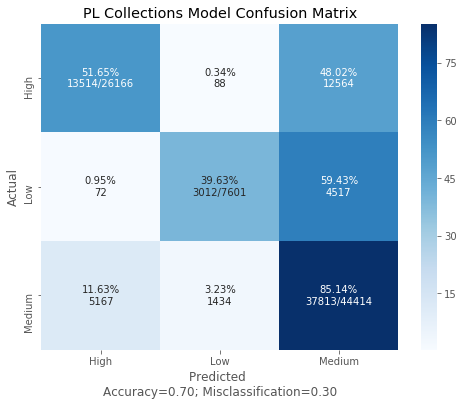

In [29]:
cm_analysis(y_true=y_test, 
            y_pred=xg_pred, 
            model = xgb,
            labels=['High', 'Low', 'Medium'])

In [43]:
X= df.drop('damage_grade', axis=1)
y= df['damage_grade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create the preprocessing pipeline
num_feat= X.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=-999)),
    ('scaler', StandardScaler())])

cat_feat= X.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_feat),
        ('cat', categorical_transformer, cat_feat)])

# Append regressor to pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', XGBClassifier(booster='gbtree', objective='multi:softprob', 
                                                  random_state=1, eval_metric="auc", num_class=3))])

model.fit(X_train, y_train)
print("Train score: %.3f" % model.score(X_train, y_train))
print("Test score: %.3f" % model.score(X_test, y_test))

y_pred= model.predict(X_test)

Train score: 0.677
Test score: 0.674
